# Wisconsin Diagnostic Breast Cancer
*In this notebook we scrape this data, analyze it and make some ML models to predict any data object's class.  
There are both numeric and categorical features in the dataset.*

Initialization: libs imports.

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Constants definition.

In [69]:
def process_string(any_string):
    return any_string.lower().replace(" ", "_")

URL_TO_DATA = r"https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

BASIC_NUMERIC_COLUMNS_NAMES = list(map(process_string, [
    "radius",
    "texture",
    "perimeter",
    "area",
    "smoothness",
    "compactness",
    "concavity",
    "concave points",
    "symmetry",
    "fractal dimension"
]))
COLUMNS_NAMES = list(map(process_string, ["ID number", "Diagnosis"])) + [
    column_name + "_mean" for column_name in BASIC_NUMERIC_COLUMNS_NAMES
] + [
    column_name + "_SE" for column_name in BASIC_NUMERIC_COLUMNS_NAMES
] + [
    column_name + "_worst" for column_name in BASIC_NUMERIC_COLUMNS_NAMES
]
DATA_DELIMITER = ","

PLOTS_DIRECTORY = "plots/"
PICTURE_FORMAT = ".png"

(COLUMNS_NAMES, len(COLUMNS_NAMES))

(['id_number',
  'diagnosis',
  'radius_mean',
  'texture_mean',
  'perimeter_mean',
  'area_mean',
  'smoothness_mean',
  'compactness_mean',
  'concavity_mean',
  'concave_points_mean',
  'symmetry_mean',
  'fractal_dimension_mean',
  'radius_SE',
  'texture_SE',
  'perimeter_SE',
  'area_SE',
  'smoothness_SE',
  'compactness_SE',
  'concavity_SE',
  'concave_points_SE',
  'symmetry_SE',
  'fractal_dimension_SE',
  'radius_worst',
  'texture_worst',
  'perimeter_worst',
  'area_worst',
  'smoothness_worst',
  'compactness_worst',
  'concavity_worst',
  'concave_points_worst',
  'symmetry_worst',
  'fractal_dimension_worst'],
 32)

Data scraping from the server.

In [70]:
df = pd.read_csv(
    URL_TO_DATA,
    header=None,
    delimiter=DATA_DELIMITER,
    names=COLUMNS_NAMES,
    index_col=COLUMNS_NAMES[0]
)

Printing of the first dataframe's rows.

In [71]:
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id_number                                                                   
842302            M        17.99         10.38          122.80     1001.0   
842517            M        20.57         17.77          132.90     1326.0   
84300903          M        19.69         21.25          130.00     1203.0   
84348301          M        11.42         20.38           77.58      386.1   
84358402          M        20.29         14.34          135.10     1297.0   

           smoothness_mean  compactness_mean  concavity_mean  \
id_number                                                      
842302             0.11840           0.27760          0.3001   
842517             0.08474           0.07864          0.0869   
84300903           0.10960           0.15990          0.1974   
84348301           0.14250           0.28390          0.2414   
84358402           0.10030           0.13280          0.1980   

           concave_points_mean  symmetry_mean           ...             \
id_number                                               ...              
842302                 0.14710         0.2419           ...              
842517                 0.07017         0.1812           ...              
84300903               0.12790         0.2069           ...              
84348301               0.10520         0.2597           ...              
84358402               0.10430         0.1809           ...              

           radius_worst  texture_worst  perimeter_worst  area_worst  \
id_number                                                             
842302            25.38          17.33           184.60      2019.0   
842517            24.99          23.41           158.80      1956.0   
84300903          23.57          25.53           152.50      1709.0   
84348301          14.91          26.50            98.87       567.7   
84358402          22.54          16.67           152.20      1575.0   

           smoothness_worst  compactness_worst  concavity_worst  \
id_number                                                         
842302               0.1622             0.6656           0.7119   
842517               0.1238             0.1866           0.2416   
84300903             0.1444             0.4245           0.4504   
84348301             0.2098             0.8663           0.6869   
84358402             0.1374             0.2050           0.4000   

           concave_points_worst  symmetry_worst  fractal_dimension_worst  
id_number                                                                 
842302                   0.2654          0.4601                  0.11890  
842517                   0.1860          0.2750                  0.08902  
84300903                 0.2430          0.3613                  0.08758  
84348301                 0.2575          0.6638                  0.17300  
84358402                 0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

Printing of the data types.

In [72]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_SE                  float64
texture_SE                 float64
perimeter_SE               float64
area_SE                    float64
smoothness_SE              float64
compactness_SE             float64
concavity_SE               float64
concave_points_SE          float64
symmetry_SE                float64
fractal_dimension_SE       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave_points_worst

Printing of the basic dataframe's statistics (numeric features).

In [73]:
df.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean           ...             \
count     569.000000              569.000000           ...              
mean        0.181162                0.062798           ...              
std         0.027414                0.007060           ...              
min         0.106000                0.049960           ...              
25%         0.161900                0.057700           ...              
50%         0.179200                0.061540           ...              
75%         0.195700                0.066120           ...              
max         0.304000                0.097440           ...              

       radius_worst  texture_worst  perimeter_worst   area_worst  \
count    569.000000     569.000000       569.000000   569.000000   
mean      16.269190      25.677223       107.261213   880.583128   
std        4.833242       6.146258        33.602542   569.356993   
min        7.930000      12.020000        50.410000   185.200000   
25%       13.010000      21.080000        84.110000   515.300000   
50%       14.970000      25.410000        97.660000   686.500000   
75%       18.790000      29.720000       125.400000  1084.000000   
max       36.040000      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave_points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 30 columns]

Printing of the basic dataframe's statistics (categorical class feature *diagnosis*).

In [74]:
df.describe(include=["object"])

diagnosis
count        569
unique         2
top            B
freq         357

Definitons of two lists: *categorical_columns_list* and *numeric_columns_list* containing names of the appropriate features.

In [75]:
categorical_columns_list = [column_name for column_name in df.columns if df[column_name].dtype.name == "object"]
numeric_columns_list = [column_name for column_name in df.columns if df[column_name].dtype.name != "object"]

(categorical_columns_list, numeric_columns_list)

(['diagnosis'],
 ['radius_mean',
  'texture_mean',
  'perimeter_mean',
  'area_mean',
  'smoothness_mean',
  'compactness_mean',
  'concavity_mean',
  'concave_points_mean',
  'symmetry_mean',
  'fractal_dimension_mean',
  'radius_SE',
  'texture_SE',
  'perimeter_SE',
  'area_SE',
  'smoothness_SE',
  'compactness_SE',
  'concavity_SE',
  'concave_points_SE',
  'symmetry_SE',
  'fractal_dimension_SE',
  'radius_worst',
  'texture_worst',
  'perimeter_worst',
  'area_worst',
  'smoothness_worst',
  'compactness_worst',
  'concavity_worst',
  'concave_points_worst',
  'symmetry_worst',
  'fractal_dimension_worst'])

Drawing matrix of scatter plots of numeric features.

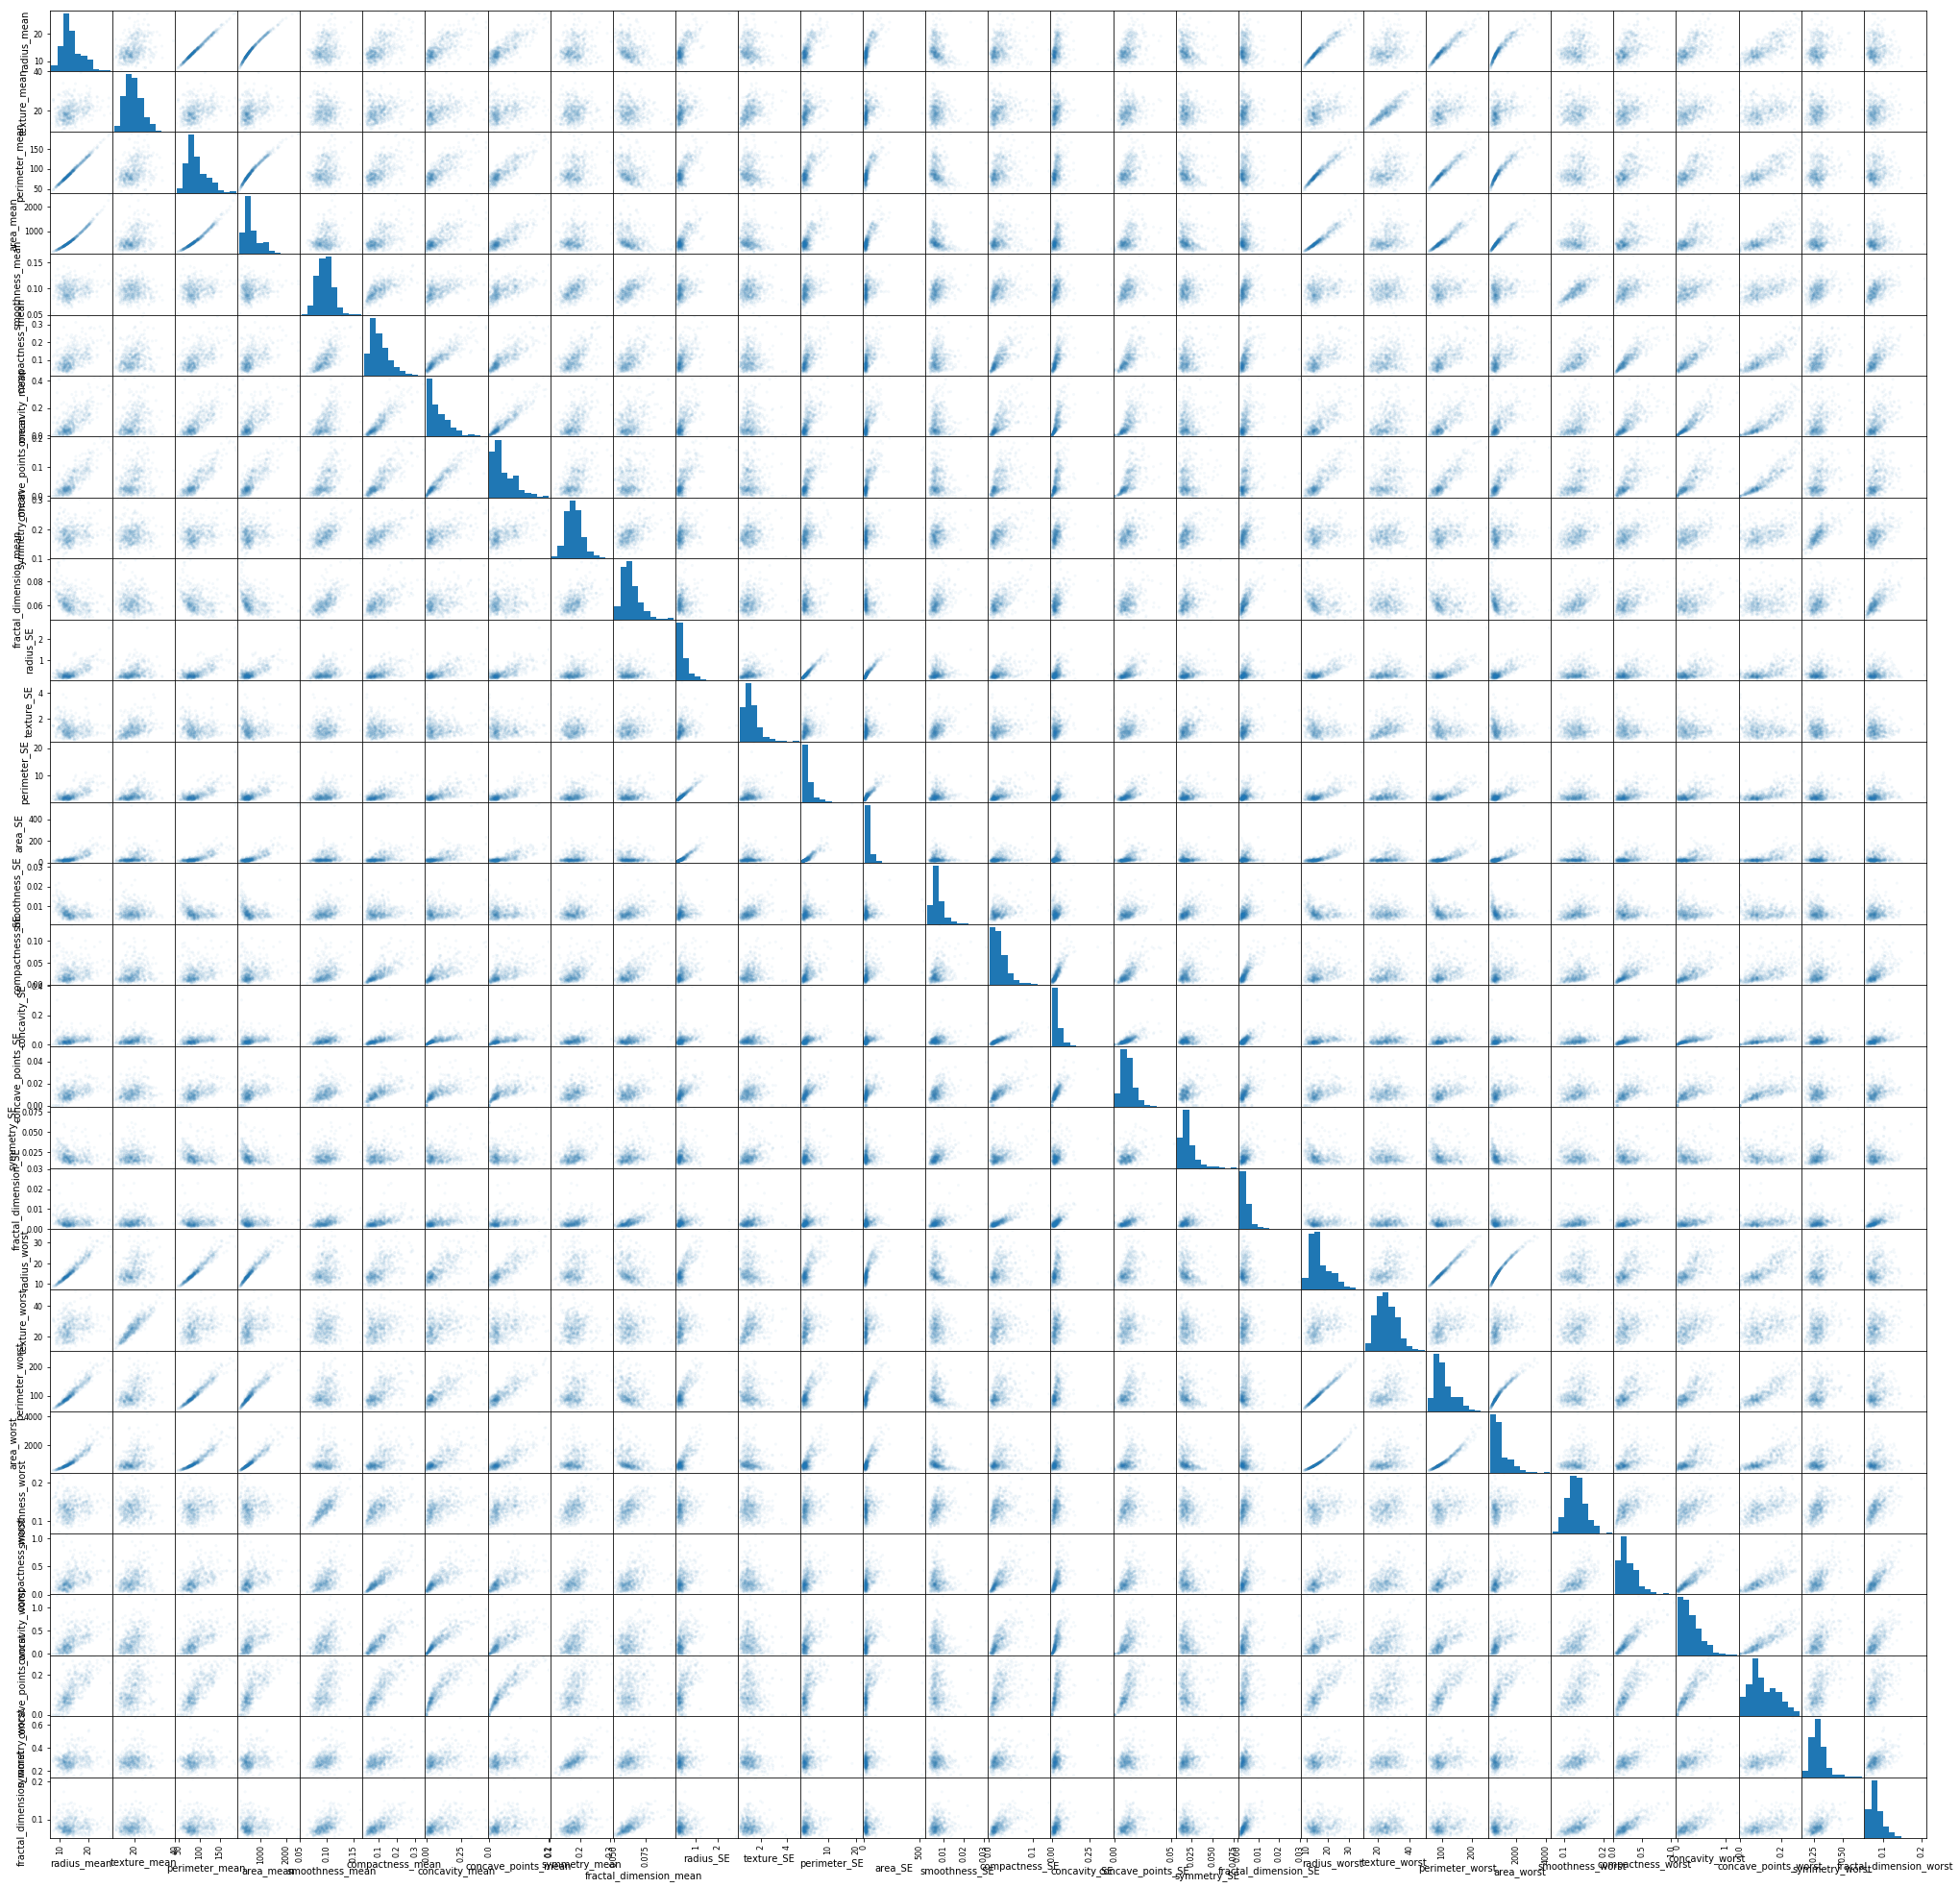

In [76]:
from pandas.plotting import scatter_matrix
scatter_matrix_plot = scatter_matrix(
    df,
    alpha=0.05,
    figsize=(35, 35)
)
plt.savefig(PLOTS_DIRECTORY + "scatter_matrix_before" + PICTURE_FORMAT)

Printing of the correlation table of the numeric features.

In [77]:
df.corr()

radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.323782        0.997855   0.987357   
texture_mean                0.323782      1.000000        0.329533   0.321086   
perimeter_mean              0.997855      0.329533        1.000000   0.986507   
area_mean                   0.987357      0.321086        0.986507   1.000000   
smoothness_mean             0.170581     -0.023389        0.207278   0.177028   
compactness_mean            0.506124      0.236702        0.556936   0.498502   
concavity_mean              0.676764      0.302418        0.716136   0.685983   
concave_points_mean         0.822529      0.293464        0.850977   0.823269   
symmetry_mean               0.147741      0.071401        0.183027   0.151293   
fractal_dimension_mean     -0.311631     -0.076437       -0.261477  -0.283110   
radius_SE                   0.679090      0.275869        0.691765   0.732562   
texture_SE                 -0.097317      0.386358       -0.086761  -0.066280   
perimeter_SE                0.674172      0.281673        0.693135   0.726628   
area_SE                     0.735864      0.259845        0.744983   0.800086   
smoothness_SE              -0.222600      0.006614       -0.202694  -0.166777   
compactness_SE              0.206000      0.191975        0.250744   0.212583   
concavity_SE                0.194204      0.143293        0.228082   0.207660   
concave_points_SE           0.376169      0.163851        0.407217   0.372320   
symmetry_SE                -0.104321      0.009127       -0.081629  -0.072497   
fractal_dimension_SE       -0.042641      0.054458       -0.005523  -0.019887   
radius_worst                0.969539      0.352573        0.969476   0.962746   
texture_worst               0.297008      0.912045        0.303038   0.287489   
perimeter_worst             0.965137      0.358040        0.970387   0.959120   
area_worst                  0.941082      0.343546        0.941550   0.959213   
smoothness_worst            0.119616      0.077503        0.150549   0.123523   
compactness_worst           0.413463      0.277830        0.455774   0.390410   
concavity_worst             0.526911      0.301025        0.563879   0.512606   
concave_points_worst        0.744214      0.295316        0.771241   0.722017   
symmetry_worst              0.163953      0.105008        0.189115   0.143570   
fractal_dimension_worst     0.007066      0.119205        0.051019   0.003738   

                         smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                     0.170581          0.506124        0.676764   
texture_mean                   -0.023389          0.236702        0.302418   
perimeter_mean                  0.207278          0.556936        0.716136   
area_mean                       0.177028          0.498502        0.685983   
smoothness_mean                 1.000000          0.659123        0.521984   
compactness_mean                0.659123          1.000000        0.883121   
concavity_mean                  0.521984          0.883121        1.000000   
concave_points_mean             0.553695          0.831135        0.921391   
symmetry_mean                   0.557775          0.602641        0.500667   
fractal_dimension_mean          0.584792          0.565369        0.336783   
radius_SE                       0.301467          0.497473        0.631925   
texture_SE                      0.068406          0.046205        0.076218   
perimeter_SE                    0.296092          0.548905        0.660391   
area_SE                         0.246552          0.455653        0.617427   
smoothness_SE                   0.332375          0.135299        0.098564   
compactness_SE                  0.318943          0.738722        0.670279   
concavity_SE                    0.248396          0.570517        0.691270   
concave_points_SE               0.380676          0.642262        0.683260   
symmetry_SE                    

Drop one of the features $f \in \big\{f_1,\ f_2\big\}$ of all the features combination pairs where: $$ \begin{cases} \big|corr\big(f_1,\ f_2\big)\big| \ge 0.9, \\ f = \arg\max\limits_{f} std\big(f_1,\ f_2\big); \end{cases}$$

In [78]:
counter = 0
CORRELATION_LIMIT = 0.9
for first_column in numeric_columns_list:
    counter += 1
    for second_column in numeric_columns_list[counter:]:
        try:
            current_pair_correlation = df[first_column].corr(df[second_column])
        except KeyError:
            pass
        else:
            if abs(current_pair_correlation) >= CORRELATION_LIMIT:
                print(
                    (first_column, second_column),
                    "->",
                    current_pair_correlation
                )
                if df[first_column].std() > df[second_column].std():
                    df = df.drop(first_column, axis=1)
                elif df[first_column].std() < df[second_column].std():
                    df = df.drop(second_column, axis=1)
        
        

('radius_mean', 'perimeter_mean') -> 0.9978552814938109
('radius_mean', 'area_mean') -> 0.9873571700566123
('radius_mean', 'radius_worst') -> 0.9695389726112063
('radius_mean', 'perimeter_worst') -> 0.9651365139559877
('radius_mean', 'area_worst') -> 0.9410824595860462
('texture_mean', 'texture_worst') -> 0.9120445888404215
('concavity_mean', 'concave_points_mean') -> 0.9213910263788595
('concave_points_mean', 'concave_points_worst') -> 0.9101553142985932
('radius_SE', 'perimeter_SE') -> 0.9727936770160754
('radius_SE', 'area_SE') -> 0.9518301121109901


In [79]:
df.head()

diagnosis  radius_mean  texture_mean  smoothness_mean  \
id_number                                                         
842302            M        17.99         10.38          0.11840   
842517            M        20.57         17.77          0.08474   
84300903          M        19.69         21.25          0.10960   
84348301          M        11.42         20.38          0.14250   
84358402          M        20.29         14.34          0.10030   

           compactness_mean  concave_points_mean  symmetry_mean  \
id_number                                                         
842302              0.27760              0.14710         0.2419   
842517              0.07864              0.07017         0.1812   
84300903            0.15990              0.12790         0.2069   
84348301            0.28390              0.10520         0.2597   
84358402            0.13280              0.10430         0.1809   

           fractal_dimension_mean  radius_SE  texture_SE  \
id_number                                                  
842302                    0.07871     1.0950      0.9053   
842517                    0.05667     0.5435      0.7339   
84300903                  0.05999     0.7456      0.7869   
84348301                  0.09744     0.4956      1.1560   
84358402                  0.05883     0.7572      0.7813   

                    ...             compactness_SE  concavity_SE  \
id_number           ...                                            
842302              ...                    0.04904       0.05373   
842517              ...                    0.01308       0.01860   
84300903            ...                    0.04006       0.03832   
84348301            ...                    0.07458       0.05661   
84358402            ...                    0.02461       0.05688   

           concave_points_SE  symmetry_SE  fractal_dimension_SE  \
id_number                                                         
842302               0.01587      0.03003              0.006193   
842517               0.01340      0.01389              0.003532   
84300903             0.02058      0.02250              0.004571   
84348301             0.01867      0.05963              0.009208   
84358402             0.01885      0.01756              0.005115   

           smoothness_worst  compactness_worst  concavity_worst  \
id_number                                                         
842302               0.1622             0.6656           0.7119   
842517               0.1238             0.1866           0.2416   
84300903             0.1444             0.4245           0.4504   
84348301             0.2098             0.8663           0.6869   
84358402             0.1374             0.2050           0.4000   

           symmetry_worst  fractal_dimension_worst  
id_number                                           
842302             0.4601                  0.11890  
842517             0.2750                  0.08902  
84300903           0.3613                  0.08758  
84348301           0.6638                  0.17300  
84358402           0.2364                  0.07678  

[5 rows x 21 columns]

In [80]:
df.corr()

radius_mean  texture_mean  smoothness_mean  \
radius_mean                 1.000000      0.323782         0.170581   
texture_mean                0.323782      1.000000        -0.023389   
smoothness_mean             0.170581     -0.023389         1.000000   
compactness_mean            0.506124      0.236702         0.659123   
concave_points_mean         0.822529      0.293464         0.553695   
symmetry_mean               0.147741      0.071401         0.557775   
fractal_dimension_mean     -0.311631     -0.076437         0.584792   
radius_SE                   0.679090      0.275869         0.301467   
texture_SE                 -0.097317      0.386358         0.068406   
smoothness_SE              -0.222600      0.006614         0.332375   
compactness_SE              0.206000      0.191975         0.318943   
concavity_SE                0.194204      0.143293         0.248396   
concave_points_SE           0.376169      0.163851         0.380676   
symmetry_SE                -0.104321      0.009127         0.200774   
fractal_dimension_SE       -0.042641      0.054458         0.283607   
smoothness_worst            0.119616      0.077503         0.805324   
compactness_worst           0.413463      0.277830         0.472468   
concavity_worst             0.526911      0.301025         0.434926   
symmetry_worst              0.163953      0.105008         0.394309   
fractal_dimension_worst     0.007066      0.119205         0.499316   

                         compactness_mean  concave_points_mean  symmetry_mean  \
radius_mean                      0.506124             0.822529       0.147741   
texture_mean                     0.236702             0.293464       0.071401   
smoothness_mean                  0.659123             0.553695       0.557775   
compactness_mean                 1.000000             0.831135       0.602641   
concave_points_mean              0.831135             1.000000       0.462497   
symmetry_mean                    0.602641             0.462497       1.000000   
fractal_dimension_mean           0.565369             0.166917       0.479921   
radius_SE                        0.497473             0.698050       0.303379   
texture_SE                       0.046205             0.021480       0.128053   
smoothness_SE                    0.135299             0.027653       0.187321   
compactness_SE                   0.738722             0.490424       0.421659   
concavity_SE                     0.570517             0.439167       0.342627   
concave_points_SE                0.642262             0.615634       0.393298   
symmetry_SE                      0.229977             0.095351       0.449137   
fractal_dimension_SE             0.507318             0.257584       0.331786   
smoothness_worst                 0.565541             0.452753       0.426675   
compactness_worst                0.865809             0.667454       0.473200   
concavity_worst                  0.816275             0.752399       0.433721   
symmetry_worst                   0.510223             0.375744       0.699826   
fractal_dimension_worst          0.687382             0.368661       0.438413   

                         fractal_dimension_mean  radius_SE  texture_SE  \
radius_mean                           -0.311631   0.679090   -0.097317   
texture_mean                          -0.076437   0.275869    0.386358   
smoothness_mean                        0.584792   0.301467    0.068406   
compactness_mean                       0.565369   0.497473    0.046205   
concave_points_mean                    0.166917   0.698050    0.021480   
symmetry_mean                          0.479921   0.303379    0.128053   
fractal_dimension_mean                 1.000000   0.000111    0.164174   
radius_SE                              0.000111   1.000000    0.213247   
texture_SE                             0.164174   0.213247    1.000000   
smoothness_SE                          0.401964   0.164514    0.397243   
compactness_SE   

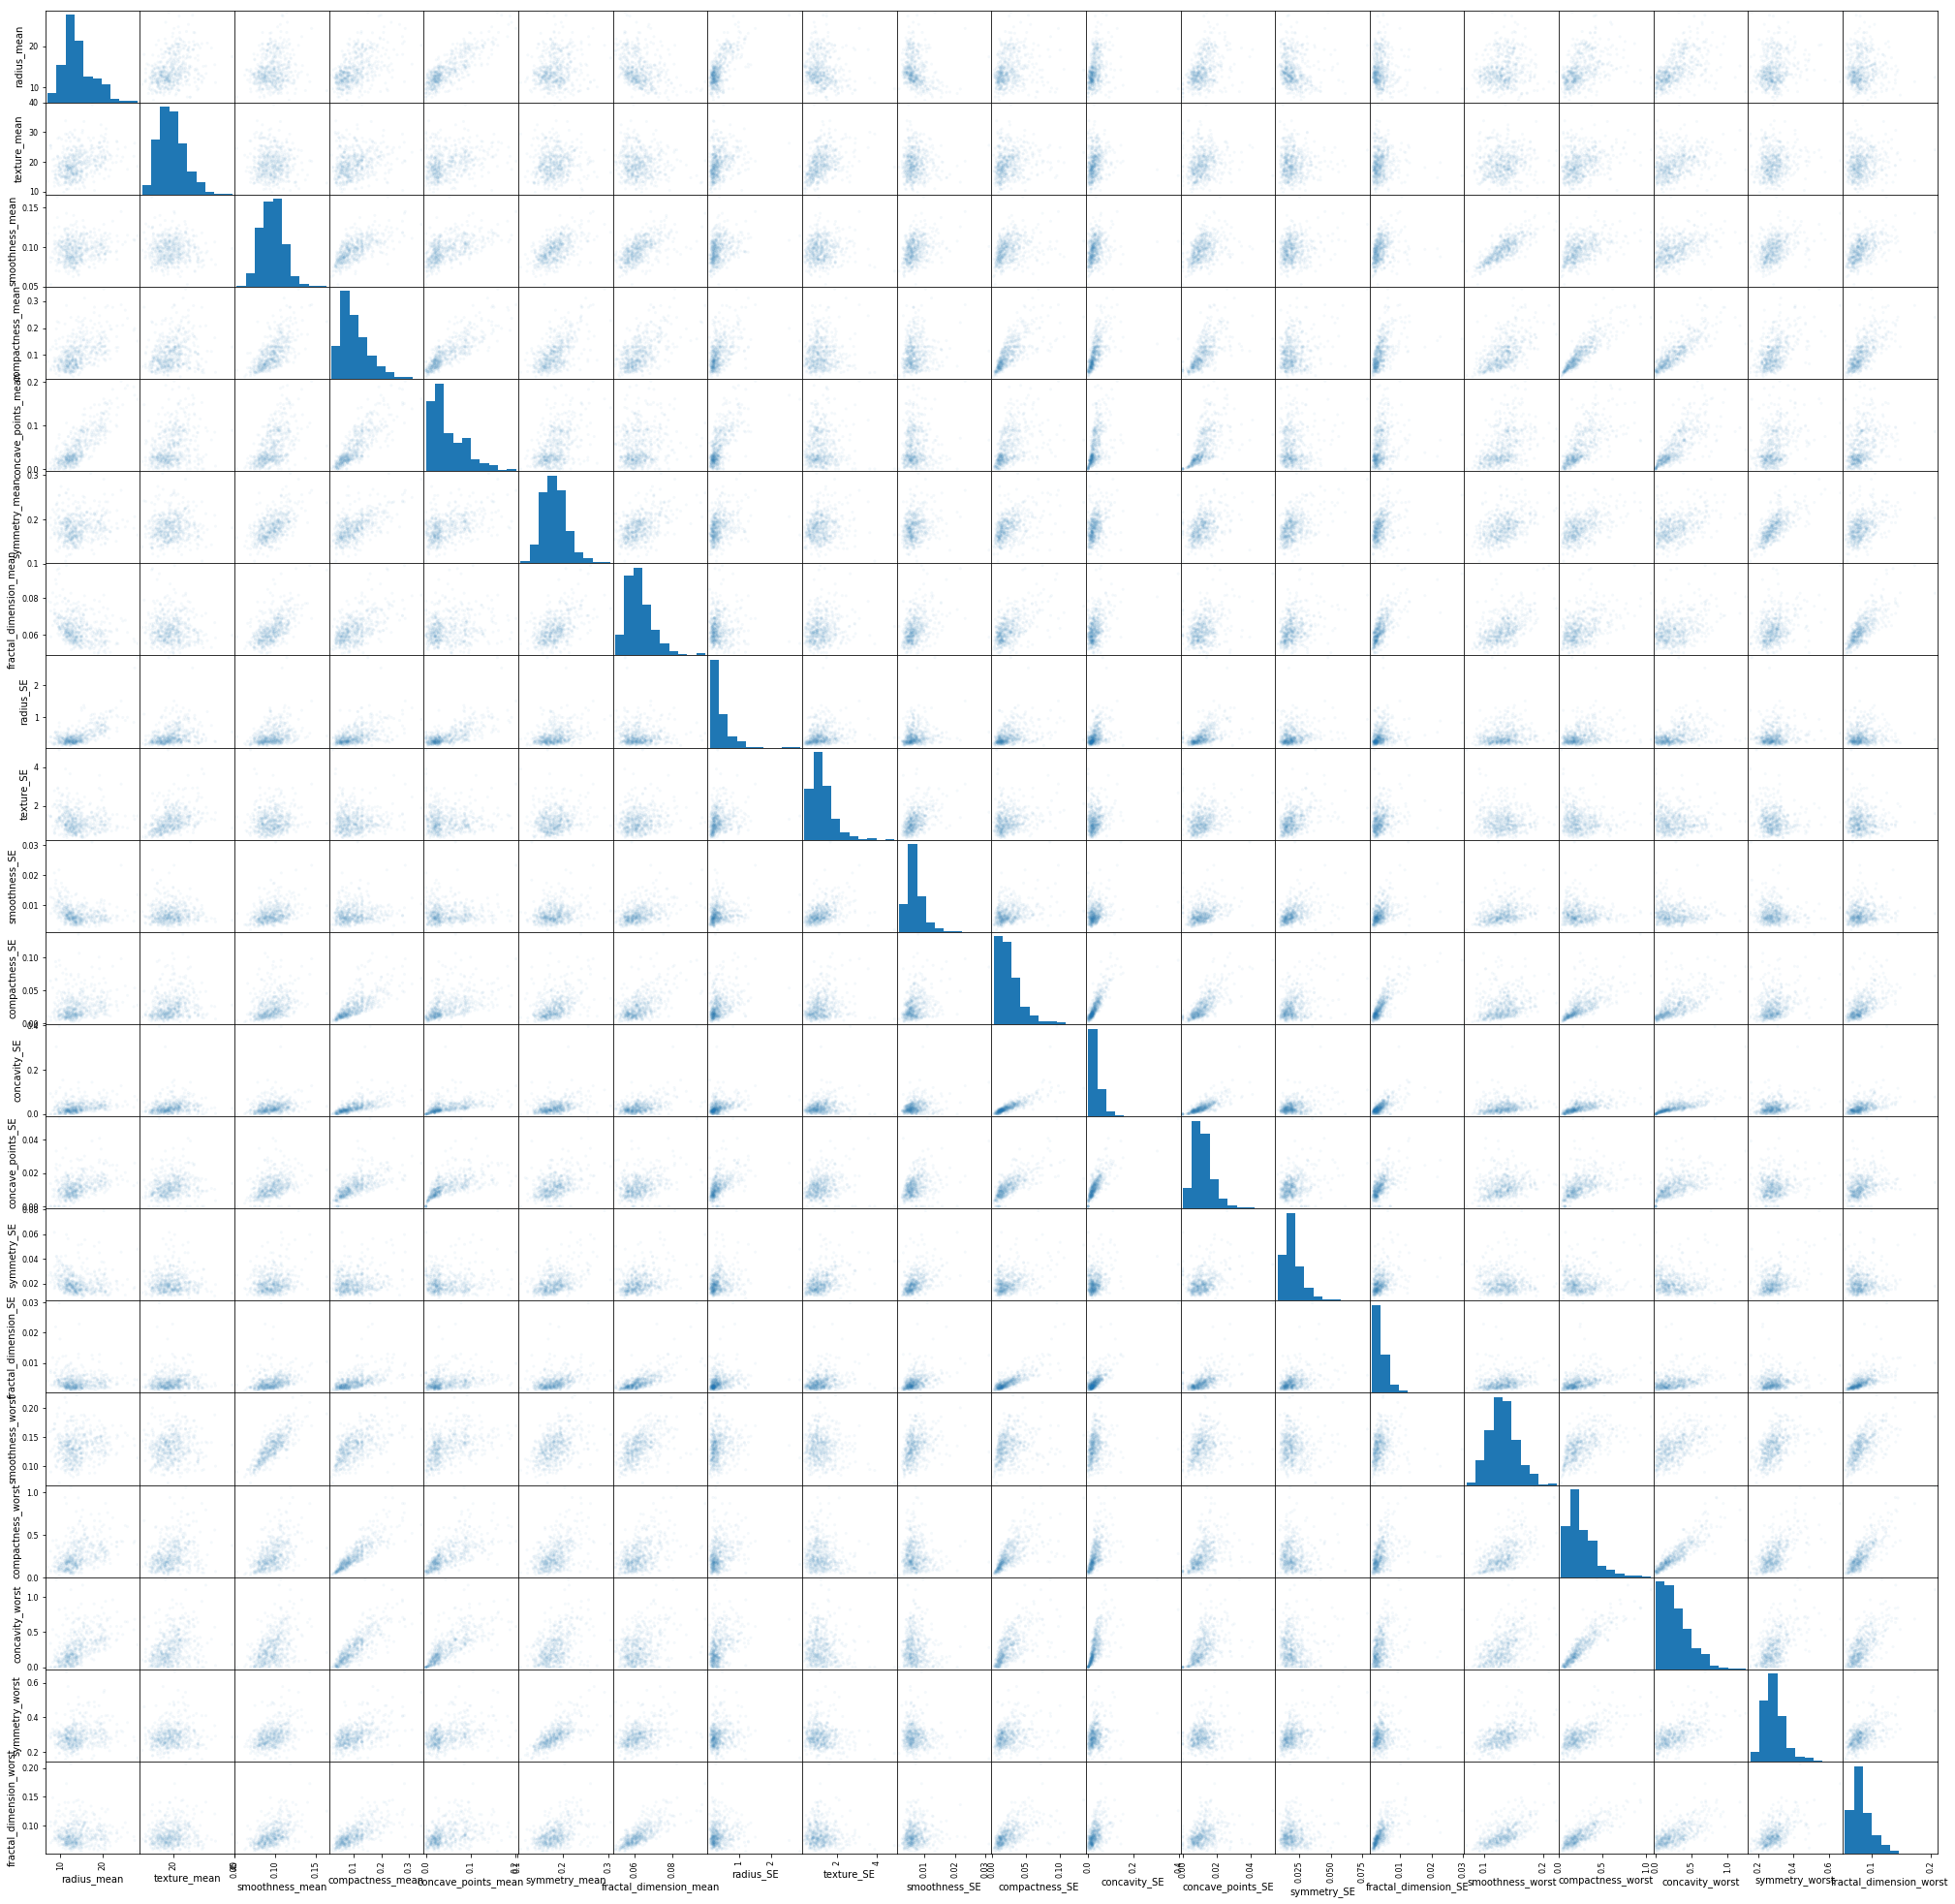

In [81]:
scatter_matrix_plot = scatter_matrix(
    df,
    alpha=0.05,
    figsize=(35, 35)
)
plt.savefig(PLOTS_DIRECTORY + "scatter_matrix_after" + PICTURE_FORMAT)

Draw histograms for each numeric feature.

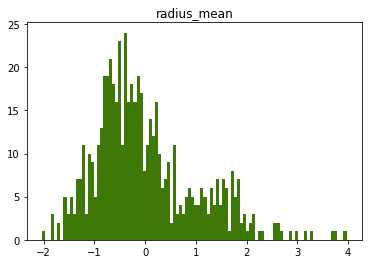

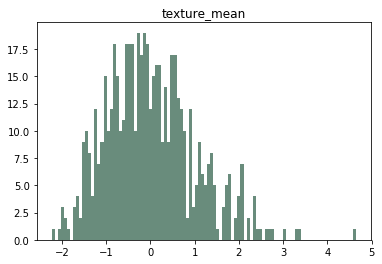

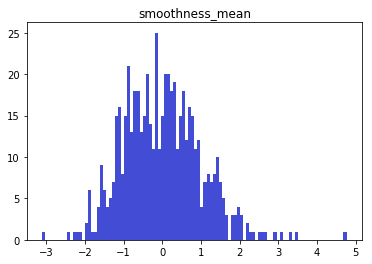

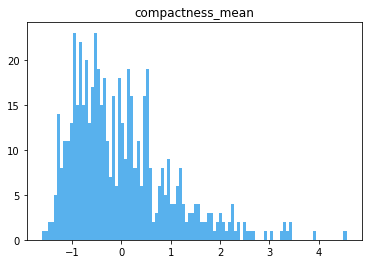

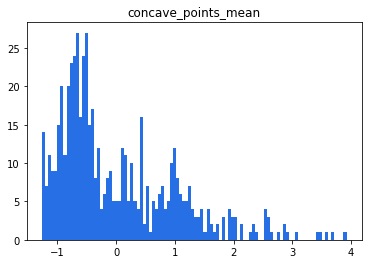

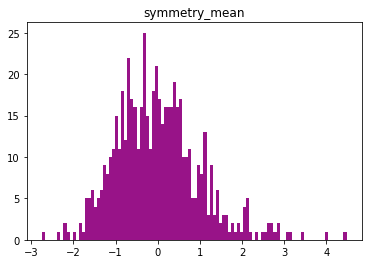

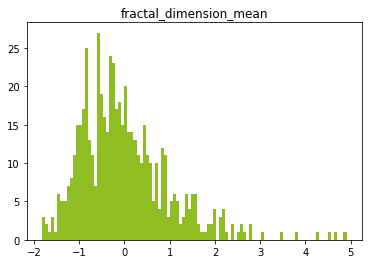

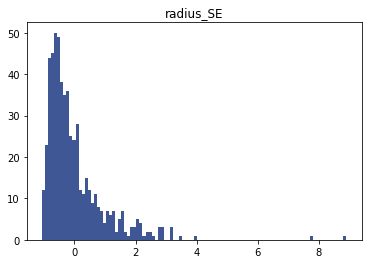

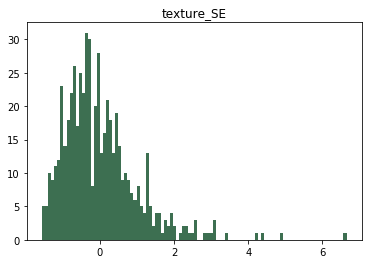

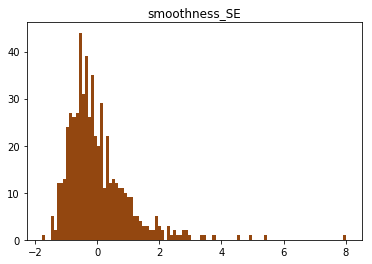

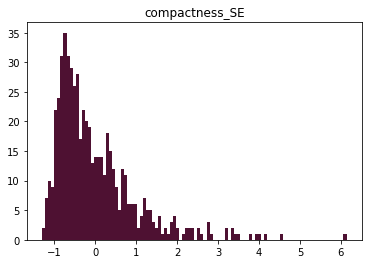

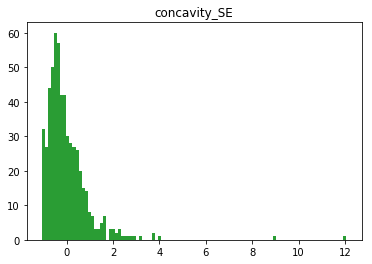

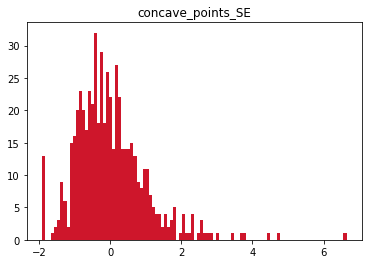

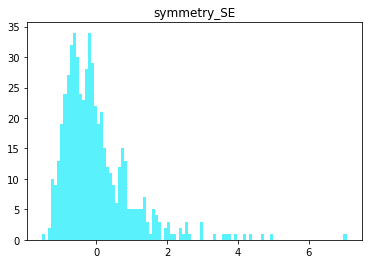

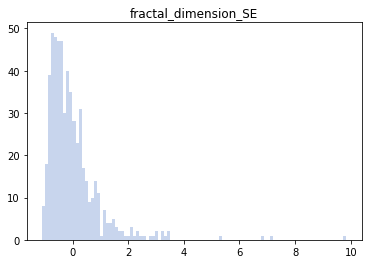

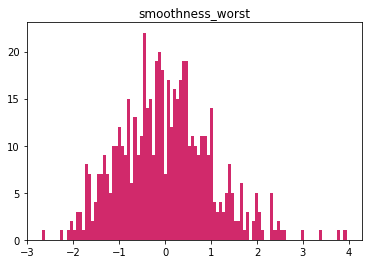

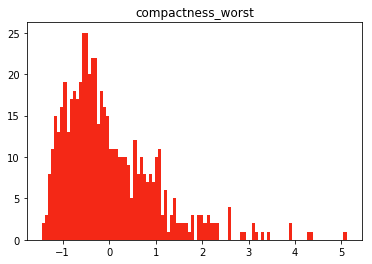

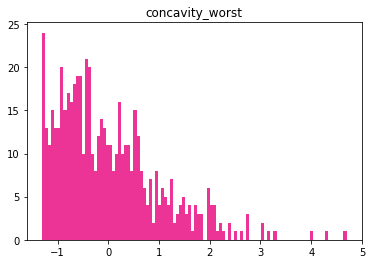

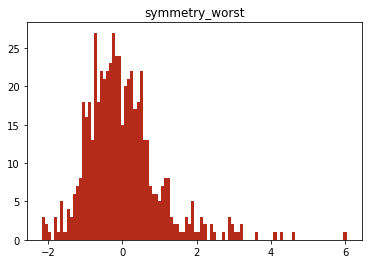

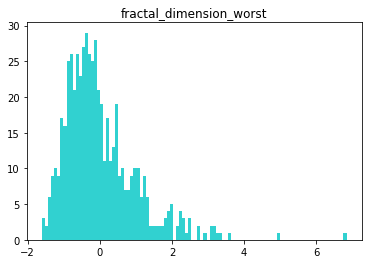

In [97]:
from random import randint

for numeric_column in numeric_columns_list:
    try:
        plt.hist(
            df[numeric_column],
            bins=100,
            color=("#%02x%02x%02x") % (
                randint(0, 255),
                randint(0, 255),
                randint(0, 255)
            )
        )
        plt.title(numeric_column)
    except KeyError:
        pass
    else:
        plt.savefig(PLOTS_DIRECTORY + numeric_column + PICTURE_FORMAT)
        plt.show()


Histogram for categorical features.

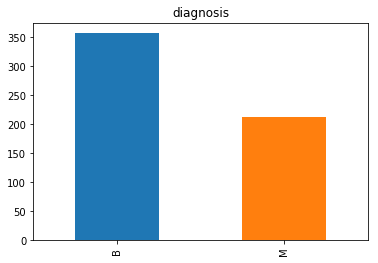

In [83]:
for categorical_column_name in categorical_columns_list:
    df_plot = df[categorical_column_name].value_counts().plot(
        kind="bar",
        title=categorical_column_name
    )
    
    plt.show()
    fig = df_plot.get_figure()
    fig.savefig(PLOTS_DIRECTORY + categorical_column_name + PICTURE_FORMAT)

Normalize numeric data.

In [84]:
for numeric_column_name in numeric_columns_list:
    try:
        df[numeric_column_name] = (df[numeric_column_name] - df[numeric_column_name].mean()) / df[numeric_column_name].std()
    except KeyError:
        continue

In [85]:
df.describe()

radius_mean  texture_mean  smoothness_mean  compactness_mean  \
count  5.690000e+02  5.690000e+02     5.690000e+02      5.690000e+02   
mean  -3.136331e-15 -6.558316e-15     6.120470e-15     -1.074321e-15   
std    1.000000e+00  1.000000e+00     1.000000e+00      1.000000e+00   
min   -2.027864e+00 -2.227289e+00    -3.109349e+00     -1.608721e+00   
25%   -6.887793e-01 -7.253249e-01    -7.103378e-01     -7.464292e-01   
50%   -2.148925e-01 -1.045442e-01    -3.486040e-02     -2.217454e-01   
75%    4.689800e-01  5.836621e-01     6.356397e-01      4.934227e-01   
max    3.967796e+00  4.647799e+00     4.766717e+00      4.564409e+00   

       concave_points_mean  symmetry_mean  fractal_dimension_mean  \
count         5.690000e+02   5.690000e+02            5.690000e+02   
mean          1.006030e-15  -1.888550e-15            4.860396e-16   
std           1.000000e+00   1.000000e+00            1.000000e+00   
min          -1.260710e+00  -2.741705e+00           -1.818265e+00   
25%          -7.372951e-01  -7.026215e-01           -7.220040e-01   
50%          -3.973715e-01  -7.156354e-02           -1.781226e-01   
75%           6.463664e-01   5.303125e-01            4.705693e-01   
max           3.924477e+00   4.480808e+00            4.906602e+00   

          radius_SE    texture_SE  smoothness_SE  compactness_SE  \
count  5.690000e+02  5.690000e+02   5.690000e+02    5.690000e+02   
mean  -9.998836e-16 -9.782255e-16  -7.449006e-16   -3.976511e-16   
std    1.000000e+00  1.000000e+00   1.000000e+00    1.000000e+00   
min   -1.058992e+00 -1.552898e+00  -1.774504e+00   -1.296957e+00   
25%   -6.230224e-01 -6.941984e-01  -6.234697e-01   -6.923171e-01   
50%   -2.919882e-01 -1.973239e-01  -2.201415e-01   -2.807733e-01   
75%    2.658657e-01  4.661422e-01   3.680315e-01    3.893116e-01   
max    8.899079e+00  6.649429e+00   8.022940e+00    6.138081e+00   

       concavity_SE  concave_points_SE   symmetry_SE  fractal_dimension_SE  \
count  5.690000e+02       5.690000e+02  5.690000e+02          5.690000e+02   
mean   1.098906e-15      -2.766777e-16 -3.459447e-16         -3.512129e-18   
std    1.000000e+00       1.000000e+00  1.000000e+00          1.000000e+00   
min   -1.056571e+00      -1.911765e+00 -1.531542e+00         -1.096004e+00   
25%   -5.566714e-01      -6.738971e-01 -6.511078e-01         -5.846041e-01   
50%   -1.988904e-01      -1.403723e-01 -2.192375e-01         -2.297383e-01   
75%    3.364561e-01       4.722412e-01  3.553798e-01          2.883884e-01   
max    1.206207e+01       6.643755e+00  7.065700e+00          9.842932e+00   

       smoothness_worst  compactness_worst  concavity_worst  symmetry_worst  \
count      5.690000e+02       5.690000e+02     5.690000e+02    5.690000e+02   
mean      -5.033661e-15      -2.118204e-15     6.649631e-16   -2.481734e-15   
std        1.000000e+00       1.000000e+00     1.000000e+00    1.000000e+00   
min       -2.680337e+00      -1.442609e+00    -1.304683e+00   -2.159060e+00   
25%       -6.906227e-01      -6.804845e-01    -7.558491e-01   -6.412994e-01   
50%       -4.680159e-02      -2.692639e-01    -2.180402e-01   -1.272975e-01   
75%        5.970195e-01       5.391944e-01     5.306742e-01    4.497425e-01   
max        3.951897e+00       5.108382e+00     4.696536e+00    6.040726e+00   

       fractal_dimension_worst  
count             5.690000e+02  
mean              2.424930e-15  
std               1.000000e+00  
min              -1.600431e+00  
25%              -6.913035e-01  
50%              -2.162538e-01  
75%               4.503661e-01  
max               6.840837e+00

Vectorize categorical data.

In [86]:
categorical_data_descriprion = df[categorical_columns_list].describe()
binary_columns_names = [
    column_name for column_name in categorical_columns_list if categorical_data_descriprion[column_name]["unique"] == 2
]
nonbinary_columns_names = [
    column_name for column_name in categorical_columns_list if categorical_data_descriprion[column_name]["unique"] > 2
]

binary_columns_names, nonbinary_columns_names

(['diagnosis'], [])

In [87]:
binary_columns_info = {}
for binary_column_name in binary_columns_names:
    binary_columns_info[binary_column_name] = categorical_data_descriprion[binary_column_name]["top"]
    
    top_value_columns = df[binary_column_name] == binary_columns_info[binary_column_name]
    
    df.loc[top_value_columns, binary_column_name] = 1
    df.loc[np.logical_not(top_value_columns), binary_column_name] = 0

In [88]:
df.head(25)

diagnosis  radius_mean  texture_mean  smoothness_mean  \
id_number                                                          
842302             0     1.096100     -2.071512         1.567087   
842517             0     1.828212     -0.353322        -0.826235   
84300903           0     1.578499      0.455786         0.941382   
84348301           0    -0.768233      0.253509         3.280667   
84358402           0     1.748758     -1.150804         0.280125   
843786             0    -0.475956     -0.834601         2.235455   
844359             0     1.169878      0.160508        -0.123028   
84458202           0    -0.118413      0.358135         1.602639   
844981             0    -0.319885      0.588312         2.199903   
84501001           0    -0.473118      1.104467         1.581308   
845636             0     0.537083      0.918465        -1.016791   
84610002           0     0.468980     -0.325421         0.052596   
846226             0     1.430942      1.281168         0.073927   
846381             0     0.488843      1.083542        -0.878141   
84667401           0    -0.112737      0.771989         1.190242   
84799002           0     0.117112      1.918224         1.247125   
848406             0     0.156839      0.195384         0.164228   
84862001           0     0.568298      0.323260         1.467543   
849014             0     1.612551      0.665038         0.138631   
8510426            1    -0.166653     -1.146154         0.101657   
8510653            1    -0.297184     -0.832276         0.792066   
8510824            1    -1.311926     -1.592558         0.429441   
8511133            0     0.344124     -1.169404         0.777846   
851509             0     1.995633      0.871965        -0.147914   
852552             0     0.715855      0.486011         1.119139   

           compactness_mean  concave_points_mean  symmetry_mean  \
id_number                                                         
842302             3.280628             2.530249       2.215566   
842517            -0.486643             0.547662       0.001391   
84300903           1.052000             2.035440       0.938859   
84348301           3.399917             1.450431       2.864862   
84358402           0.538866             1.427237      -0.009552   
843786             1.243242             0.823931       1.004518   
844359             0.088218             0.646366      -0.064268   
84458202           1.139100             0.281702       1.402121   
844981             1.682529             1.149680       1.963872   
84501001           2.561105             0.940932       0.796597   
845636            -0.712915            -0.404330      -1.034565   
84610002           0.470701             0.441742       0.110823   
846226             2.678501             1.620522       2.135315   
846381            -0.078409             0.121663       0.129062   
84667401           2.366076             0.807437       0.938859   
84799002           1.044426             0.637089       1.792428   
848406            -0.612371             0.094603      -0.822997   
84862001           1.852943             1.388580       1.285393   
849014            -0.031072             1.187048      -0.837588   
8510426           -0.436466            -0.028584       0.267676   
8510653            0.429044            -0.459223       0.566790   
8510824           -0.746429            -0.725698       0.012334   
8511133            2.066906             1.253538       2.587634   
851509            -0.040539             0.963869      -0.155461   
852552             0.783125             1.102518       0.668926   

           fractal_dimension_mean  radius_SE  texture_SE  \
id_number                                                  
842302                   2.253764   2.487545   -0.564768   
842517                  -0.867889   0.498816   -0.875473   
84300903                -0.397658   1.227596   -0.779398   
84348301                 4.906602   0.326087   -0.110312   
8435

Split data to train and test parts ($30\%$ of data is for tests).

In [89]:
from sklearn.model_selection import train_test_split

X_data = df.drop(columns=[COLUMNS_NAMES[1]])
y_data = df[COLUMNS_NAMES[1]]

X_train, X_test, y_train, y_test = train_test_split(
    X_data,
    y_data,
    test_size=0.3
)

Using *K nearest neighbors* algorythm

In [90]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [91]:
def show_errors(train_error, test_error):
    error_info_format = \
        "Train data prediction error: {train:.3%}\nTest data prediction error: {test:.3%}"
    
    print(
        error_info_format.format(
            train=train_error,
            test=test_error
        )
    )

train_data_prediction = knn_model.predict(X_train)
train_prediction_error = np.mean(train_data_prediction != y_train)

test_data_prediction = knn_model.predict(X_test)
test_prediction_error = np.mean(test_data_prediction != y_test)

show_errors(
    train_prediction_error,
    test_prediction_error
)

Train data prediction error: 4.523%
Test data prediction error: 1.170%


Using GridSearchCV algorythm for searching optimal *K nearest neighbors* algorythm parameter (*n_neighbors*).

In [92]:
from sklearn.model_selection import GridSearchCV

n_neighbors_parameters = list(range(1, 30))
n_neighbors_parameters.remove(5)

knn_for_grid = KNeighborsClassifier()
grid = GridSearchCV(
    knn_for_grid,
    param_grid={
        "n_neighbors": n_neighbors_parameters
    }
)

grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [93]:
print("Best error: {error:.2%} with parameter n_neighbors = {n_neighbors}".format(
        error=(1 - grid.best_score_),
        n_neighbors=grid.best_params_["n_neighbors"]
    )
)

Best error: 5.28% with parameter n_neighbors = 4


In [94]:
optimal_knn_model = KNeighborsClassifier(n_neighbors=grid.best_params_["n_neighbors"])

optimal_knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [95]:
train_data_prediction = optimal_knn_model.predict(X_train)
train_prediction_error = np.mean(train_data_prediction != y_train)

test_data_prediction = optimal_knn_model.predict(X_test)
test_prediction_error = np.mean(test_data_prediction != y_test)

show_errors(
    train_prediction_error,
    test_prediction_error
)

Train data prediction error: 3.518%
Test data prediction error: 2.339%
